# 完全採用 VGG 16 預先訓練的模型

## 載入套件

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np

## 載入模型

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


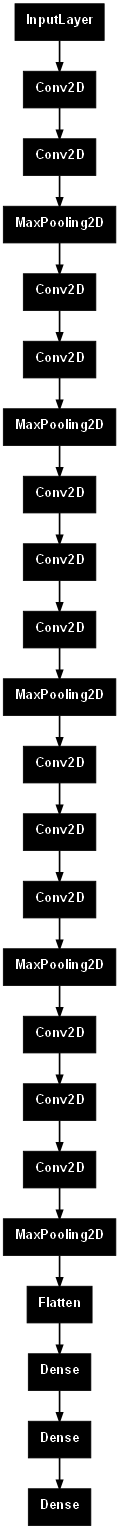

In [4]:
model = VGG16(weights='imagenet')
print(model.summary())

# 繪製模型結構
tf.keras.utils.plot_model(model, to_file='vgg16.png', dpi=60)

## 模型預測

In [6]:
# 任選一張圖片，例如大象側面照
img_path = './images/elephant.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一維，變成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
Predicted: [('n02113799', 'standard_poodle', 0.6074388), ('n02113624', 'toy_poodle', 0.25091475), ('n02113712', 'miniature_poodle', 0.067259304)]


In [7]:
# 任選一張圖片，例如大象側面照
img_path = './images/太陽花.jpg'
# 載入圖檔，並縮放寬高為 (224, 224) 
img = image.load_img(img_path, target_size=(224, 224))

# 加一維，變成 (1, 224, 224)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測
preds = model.predict(x)
# decode_predictions： 取得前 3 名的物件，每個物件屬性包括 (類別代碼, 名稱, 機率)
print('Predicted:', decode_predictions(preds, top=1000)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Predicted: [('n11939491', 'daisy', 0.9453609), ('n02206856', 'bee', 0.015733588), ('n04522168', 'vase', 0.005263982), ('n01944390', 'snail', 0.0028242744), ('n02219486', 'ant', 0.0023672236), ('n07730033', 'cardoon', 0.0016322323), ('n01914609', 'sea_anemone', 0.0011858714), ('n03991062', 'pot', 0.0010435588), ('n03930313', 'picket_fence', 0.000759781), ('n07930864', 'cup', 0.00073507015), ('n02190166', 'fly', 0.00071246905), ('n07749582', 'lemon', 0.00066443183), ('n07747607', 'orange', 0.0006248874), ('n03637318', 'lampshade', 0.0005772488), ('n07745940', 'strawberry', 0.0005719185), ('n02319095', 'sea_urchin', 0.0005464057), ('n02165456', 'ladybug', 0.0005352282), ('n03690938', 'lotion', 0.0004886451), ('n04548280', 'wall_clock', 0.00045756184), ('n02782093', 'balloon', 0.0003757102), ('n02226429', 'grasshopper', 0.00034498062), ('n03445777', 'golf_ball', 0.00030067927), ('n04423845', 'thimble', 0.00027108256), ('n01819313', 'sulphur-crested_co

In [14]:
import pandas as pd

labels = decode_predictions(preds, top=1000)[0]
df = pd.DataFrame(labels, columns=['f1', 'f2', 'f3'])
df.query('f2 == "banana"')

,f1,f2,f3
98,n07753592,banana,0.000059


## Ask ChatGPT "keras ResNet152 prediction code"

In [17]:
import numpy as np
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained ResNet152 model
model = ResNet152(weights='imagenet')

# Function to prepare the image
def prepare_image(image_path, target_size=(224, 224)):
    # Load the image with target size
    img = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match the expected input shape for the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image for ResNet152
    img_array = preprocess_input(img_array)
    return img_array

# Predict the class of an input image
def predict_image(image_path):
    # Prepare the image
    img_array = prepare_image(image_path)
    # Get predictions
    predictions = model.predict(img_array)
    # Decode predictions to get human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)  # Get top-3 predictions
    return decoded_predictions

# Example usage
if __name__ == "__main__":
    image_path = './images/bear_Bravo.jpg'  # Replace with your image path
    predictions = predict_image(image_path)
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(predictions[0]):
        print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predictions:
1: teddy (0.17)
2: worm_fence (0.07)
3: maze (0.03)


In [19]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to prepare the image
def prepare_image(image_path, target_size=(224, 224)):
    # Load the image with the target size
    img = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match the expected input shape for the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image for MobileNetV2
    img_array = preprocess_input(img_array)
    return img_array

# Predict the class of an input image
def predict_image(image_path):
    # Prepare the image
    img_array = prepare_image(image_path)
    # Get predictions
    predictions = model.predict(img_array)
    # Decode predictions to get human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)  # Get top-3 predictions
    return decoded_predictions

# Example usage
if __name__ == "__main__":
    image_path = './images/bear_Bravo.jpg'  # Replace with your image path
    predictions = predict_image(image_path)
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(predictions[0]):
        print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions:
1: teddy (0.26)
2: park_bench (0.06)
3: goose (0.01)
